First I needed to install the pybind package for python and for c++ to use:
```
pip install pybind11
sudo apt-get install pybind11-dev
sudo apt-install Jupyter-core
jupyter nbextension enable --py widgetsnbextension --sys-prefix
jupyter nbextension enable --py --sys-prefix ipympl
sudo apt-get install ffmpeg

```


In [2]:
import sys
import os
library_path = os.path.abspath("../cplusplus")
if library_path not in sys.path:
    sys.path.append(library_path)
import Orbit_Sim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image
# from IPython.display import Video

def Basic_Graphic(data,size):
    y_values = np.array(data[1])
    # Static Plot
    # plt.clf()
    plt.figure( figsize=(5,5) )

    current = int(len(y_values[0])/2)

    x_vals = []
    y_vals = []
    for x in range(size):
        x_val = y_values[:,current]
        x_vals.append(x_val)
        y_val = y_values[:,current+1]
        y_vals.append(y_val)
        plt.plot( x_val , y_val , label = 'orbit #' + str(x+1) )
        current += 3

    plt.legend()
    plt.grid()
    plt.axis('equal')
    plt.show()

# Moving Plot
def Animated_Graph(data,size,xl,xu,yl,yu,seconds = 8,lagtime = 0,name = ""):
    
    fig, ax = plt.subplots()
    y_values = np.array(data[1])

    current = int(len(y_values[0])/2)
    print(len(y_values))
    x_vals = []
    y_vals = []
    for x in range(size):
        x_val = y_values[:,current]
        x_vals.append(x_val)
        y_val = y_values[:,current+1]
        y_vals.append(y_val)
        current += 3
    line_orbits = []
    for i in range(size):
        line_orbit, = ax.plot( x_vals[i][0] , y_vals[i][0] , label = 'orbit #' + str(i+1) )
        # print(len(x_vals[i]))
        line_orbits.append(line_orbit)

    # print("size of x_vals:",len(x_vals))
    def animation_movie( frame ):
        # print("Frame:",frame)
        if lagtime == 0:
            for i, line in enumerate(line_orbits):
                line.set_xdata(x_vals[i][:frame])
                line.set_ydata(y_vals[i][:frame])
        else:
            for i, line in enumerate(line_orbits):
                line.set_xdata(x_vals[i][(frame - lagtime):frame])
                line.set_ydata(y_vals[i][(frame - lagtime):frame])
        return line_orbits
    # print(len(line_orbits))
    n_steps = int( len(y_values) )
    # print(n_steps)
    num_seconds_for_animation = seconds
    milliseconds_per_frame = 30

    frame_interval = int((milliseconds_per_frame*n_steps)/(1000*num_seconds_for_animation))
    print("frame interval:",frame_interval)

    animation = FuncAnimation( fig , animation_movie , frames = range(0,n_steps,frame_interval) , interval = milliseconds_per_frame , blit = True )
    
    

    # Display the animation inline
    ax.legend()
    ax.set_xlim(xl,xu)
    ax.set_ylim(yl,yu)
    
    # Save & Display the animation
    if name != "":
        if not os.path.isfile(name + '.gif'):
            animation.save("../animations/" + name + '.gif', writer='imagemagick', fps=30)
        Image(filename= "../animations/" + name + '.gif')
        
        # animation.save(name +'.mp4', writer='ffmpeg')
        # Video(name + '.mp4')
    else:# Use if you want to display an interactive widgit in-line
        %matplotlib widget

    
def Formatter(vector):
    VN = []
    RN = []
    for i in range(len(vector)):
        if (i % 2 == 0):
            RN += vector[i]
        else:
            VN += vector[i]
    return VN + RN


Look at how cool it looks animated!
![](./5_body_anim.mp4)

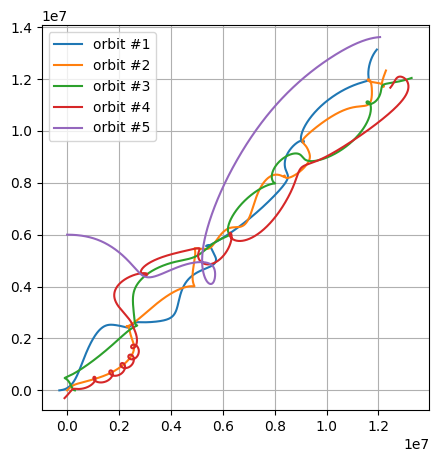

In [3]:

# G = 6.67259*10**-20

# Mass Data
masses = [10**29,10**29,10**29,10**25,10**25]

# Positional and Velocity data; Of format Rx, Vx
vectors = [
    [-300000,0,0],
    [0,0,0],
    [0,0,0],
    [250,250,0],
    [300000,0,0],
    [0,0,0],
    [-100000,-300000,0],
    [300,300,0],
    [0,6000000,0],
    [50,0,0]
]

data = Orbit_Sim.runge_kutta_system(Formatter(vectors),masses,0,150000,1,6.67259*10**-20)

# Generates a static plot of the data
Basic_Graphic(data,len(masses))

# Generates & Displays Gif Animation of the Data
# Animated_Graph(data,len(masses),-10**6,1.5*10**7,-10**6,1.5*10**7,8,0,"5_body_anim")


[0.0, 0.0, 0.0, 8.90936744039058, 28.16862242733466, -0.0005922288268305209, -12.23897241527747, 5.603781185280049, 0.2506591419204041, 0.0, 0.0, 0.0, 143179557.9215212, -47569027.33498507, 1753.005870185792, 287815514.851455, 697703381.2658194, -9337573.633872956]


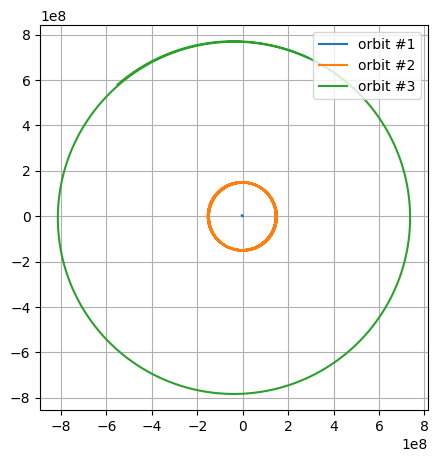

In [4]:
# # Parameters for Sun, Earth, and Jupiter
masses2 = [1.9891  * 10**30, #sun in kg
           5.97219 * 10**24, #mass of Earth in kg
           1.898   * 10**27]
# Of format Rx, Vx
vectors2 = [
    [0.0,0.0,0.0],
    [0.0,0.0,0.0],
    [ 1.431795579215212E+08,-4.756902733498507E+07,1.753005870185792E+03],
    [8.909367440390580E+00,2.816862242733466E+01,-5.922288268305209E-04],
    [2.878155148514550E+08,6.977033812658194E+08,-9.337573633872956E+06],
    [-1.223897241527747E+01,5.603781185280049E+00,2.506591419204041E-01]
]
#10.0 * 365.25 * 24 * 3600
print(Formatter(vectors2))
data2 = Orbit_Sim.runge_kutta_system(Formatter(vectors2),masses2,0.0,14 * 365.25 * 24 * 3600,3600,6.67430e-20)
Basic_Graphic(data2,len(masses2))
# Animated_Graph(data2,len(masses2),-10**9,10**9,-10**9,10**9,8,500,"Jupiter_Earth")

# Image(filename='../animations/' + 'Jupiter_Earth.gif')

In [5]:
# Now we want Earth, Moon, and Satellites:

# Lets try importing these from JPL using the appropriate library...
# pip install astroquery
from astroquery.jplhorizons import Horizons

obj = Horizons(id='Ceres', location='500@10', epochs={'start':'2024-09-10', 'stop':'2024-09-11', 'step':'1d'})
eph = obj.ephemerides()
print(eph)
print(type(eph))
print(obj.vectors())

vectors = obj.vectors()
print(np.array([vectors['x'][0], vectors['y'][0], vectors['z'][0]]) )
print(np.array([vectors['vx'][0], vectors['vy'][0], vectors['vz'][0]]))

    targetname       datetime_str   datetime_jd ... alpha_true  PABLon  PABLat
       ---               ---             d      ...    deg       deg     deg  
----------------- ----------------- ----------- ... ---------- -------- ------
1 Ceres (A801 AA) 2024-Sep-10 00:00   2460563.5 ...     0.0032 296.6427 -6.328
1 Ceres (A801 AA) 2024-Sep-11 00:00   2460564.5 ...     0.0032 296.8313 -6.356
<class 'astropy.table.table.Table'>
    targetname    datetime_jd ...       range             range_rate     
       ---             d      ...         AU                AU / d       
----------------- ----------- ... ----------------- ---------------------
1 Ceres (A801 AA)   2460563.5 ... 2.936370463863601 0.0004876799950028467
1 Ceres (A801 AA)   2460564.5 ... 2.936857051214932 0.0004854939353664387
[ 1.3089292  -2.60848729 -0.32368178]
[ 0.00873288  0.00401701 -0.00148173]


{'Sun': {'position': array([0., 0., 0.]), 'velocity': array([0., 0., 0.])}, 'Earth': {'position': array([ 1.49091765e+08, -2.01306908e+07,  6.36573224e+02]), 'velocity': array([ 3.49220441e+00,  2.93997843e+01, -2.37887271e-03])}, 'Jupiter': {'position': array([ 2.76145880e+08,  7.02941082e+08, -9.09823756e+06]), 'velocity': array([-12.32516343,   5.39761194,   0.25328454])}, 'Ceres': {'position': array([ 2.02319094e+08, -3.87168166e+08, -4.95240070e+07]), 'velocity': array([14.98612765,  7.21784724, -2.5324736 ])}, 'Mars': {'position': array([1.29183288e+08, 1.80199456e+08, 6.07687760e+05]), 'velocity': array([-18.77432792,  16.18074406,   0.79956736])}, 'Venus': {'position': array([-54908994.87779763, -93476732.38352443,   1884512.27683919]), 'velocity': array([ 29.95589905, -17.89677959,  -1.97427058])}, 'Mercury': {'position': array([-16669728.65867912,  44006718.28623949,   5125274.6181058 ]), 'velocity': array([-55.33929005, -15.44566664,   3.81361729])}}


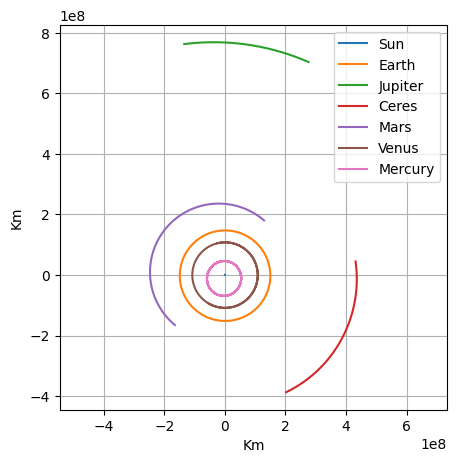

In [66]:

# from astroquery.jplhorizons import Horizons
import numpy as np
from datetime import datetime, timedelta

# A class to do all this
# A constant
JPL_DICT = {
    'Sun':      {'id':'10',  'mass': 1988400e24},
    'Mercury':  {'id':'199', 'mass': 0.33010e24},
    'Venus':    {'id':'299', 'mass': 4.8673e24},
    'Earth':    {'id':'399', 'mass': 5.9722e24},
    'Mars':     {'id':'499', 'mass': 0.64169e24},
    'Jupiter':  {'id':'599', 'mass': 1.8982e27},
    'Saturn':   {'id':'699', 'mass': 5.6834e26},
    'Uranus':   {'id':'799', 'mass': 8.6810e25},
    'Neptune':  {'id':'899', 'mass': 1.02413e26},
    'Moon':     {'id':'301', 'mass': 0.07346e24},

    # asteroids in asteroid belt
    'Ceres':    {'id':'2000001', 'mass': 9.393e20},

    # Jupiter's Largest Moons
    'Io':       {'id': '501',  'mass': 8.931938e22},
    'Europa':   {'id': '502',  'mass': 4.799844e22},
    'Ganymede': {'id': '503',  'mass': 1.4819e23},  
    'Callisto': {'id': '504',  'mass': 1.075938e23},

    # Saturn's Largest Moons
    'Dione':    {'id': '604', 'mass': 1.095452e21},
    'Rhea':     {'id': '605', 'mass': 2.306518e21},
    'Titan':    {'id': '606', 'mass': 1.3452e23},
    'Iapetus':  {'id': '608', 'mass': 1.805635e21},

    # Uranus' Largest Moons
    'Ariel':    {'id': '701', 'mass': 1.353e21},
    'Umbriel':  {'id': '702', 'mass': 1.172e21},
    'Titania':  {'id': '703', 'mass': 3.527e21},
    'Oberon':   {'id': '704', 'mass': 3.014e21},

    # Pluto
    'Pluto':    {'id': '999', 'mass': 1.303e22}      
}

class NBodySim:
    def __init__(self, names, epoch=None):
        # Initialize the arrays for names, masses, and simulation data
        self.names = names  # Names of the simulants
        masses = np.zeros(len(names))
        for i,name in enumerate(names):
            masses[i] = JPL_DICT[name]['mass']
        self.masses = masses  # Masses of the simulants
        self.data = {}  # Dictionary to store position and velocity data
        self.AU_TO_KM = 1.496e8
        self.AU_DAY_TO_KM_S = 1731.46
        self.GRAVITY_CONSTANT = 6.67430e-20
        # Set epoch to today's date if not provided
        if epoch is None:
            today = datetime.now().strftime('%Y-%m-%d')
            tomorrow = (datetime.now() + timedelta(days=1)).strftime('%Y-%m-%d')
            self.epoch = {'start': today, 'stop': tomorrow, 'step': '1d'}
        else:
            self.epoch = epoch

    def query_jpl(self):
        """Query JPL Horizons for each simulant's position and velocity data."""
        for name in self.names:
            # Querying Horizons based on the name and epoch
            obj = Horizons(id=JPL_DICT[name]['id'], location='@sun', epochs=self.epoch)
            vectors = obj.vectors()
            # Store positional and velocity data (x, y, z, vx, vy, vz)
            self.data[name] = {
                'position': np.array([vectors['x'][0]*self.AU_TO_KM, vectors['y'][0]*self.AU_TO_KM, vectors['z'][0]*self.AU_TO_KM]),
                'velocity': np.array([vectors['vx'][0]*self.AU_DAY_TO_KM_S, vectors['vy'][0]*self.AU_DAY_TO_KM_S, vectors['vz'][0]*self.AU_DAY_TO_KM_S])
            }
    
    def get_simulation_results(self):
        return self.simulation_data

    def get_masses(self):
        """Return the array of masses for simulation."""
        return np.array(self.masses)
    
    def get_init_data(self):
        """Return positional and velocity data for all simulants."""
        return {name: {'position': self.data[name]['position'],
                       'velocity': self.data[name]['velocity']}
                for name in self.names}
    
    def get_init_data_array(self):
        """Return an array containing positions and velocities for all simulants."""
        positions = []
        velocities = []
        print(self.data)
        for name in self.names:
            if name in self.data:
                pos = self.data[name]['position']
                vel = self.data[name]['velocity']
                
                positions.extend(pos)
                velocities.extend(vel)
        
        # Concatenate positions and velocities into a single array
        return np.array(velocities + positions)

    def Do_Simulation(self,begin_time,end_time,time_step):
        """Run n-body simulation from Orbit_Sim c++ code"""
        self.simulation_data = Orbit_Sim.runge_kutta_system(self.get_init_data_array(),
                                                            self.get_masses(),
                                                            begin_time, 
                                                            end_time,
                                                            time_step,
                                                            self.GRAVITY_CONSTANT)

    def label_graph(self, positions):
        """Label graph with simulated positions (provided as input)."""
        for i, name in enumerate(self.names):
            print(f"Labelling {name} at position {positions[i]}")  # Placeholder for graph labeling

    def set_epoch(self, epoch):
        """Allow the user to update the epoch if desired."""
        self.epoch = epoch

    def Basic_Graphic(self):
        y_values = np.array(self.simulation_data[1])
        # Static Plot
        # plt.clf()
        # size = len(self.masses)
        plt.figure( figsize=(5,5) )

        current = int(len(y_values[0])/2)

        x_vals = []
        y_vals = []
        for x in self.names:
            x_val = y_values[:,current]
            x_vals.append(x_val)
            y_val = y_values[:,current+1]
            y_vals.append(y_val)
            plt.plot( x_val , y_val , label = x )
            current += 3

        plt.xlabel('Kilometers')
        plt.ylabel('Kilometers')
        plt.legend()
        plt.grid()
        plt.axis('equal')
        plt.show()

# Create an instance of the NBodySim class
nbody_sim = NBodySim(['Sun', 'Earth','Jupiter','Ceres','Mars','Venus','Mercury'])

# Automatically uses today's date for the epoch
nbody_sim.query_jpl()

nbody_sim.Do_Simulation(0,365*24*3600,3600)
nbody_sim.Basic_Graphic()
# Animated_Graph(data3,len(masses2),-10**9,10**9,-10**9,10**9,8,500,"Inner Solar System")